In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('resource/Tensiometer summary 1_2_3ul 082721.csv')
df.head()

,Volumn,Power,Speed,CTRL,MAST,MCC6,MG8
0,3,0,0,47.2 (2.4),NaN,NaN,NaN
1,3,80,40,NaN,59.0 (2.4),55.0 (4.7),58.9 (3.5)
2,3,90,40,NaN,51.9 (1.2),54.5 (1.5),54.6 (2.5)
3,3,100,40,NaN,56.9 (2.1),53.2 (4.7),54.1 (2.9)
4,2,0,0,44.1 (9.5),NaN,NaN,NaN


In [5]:
df.fillna( '0', inplace = True)
df.head()

,Volumn,Power,Speed,CTRL,MAST,MCC6,MG8
0,3,0,0,47.2 (2.4),0,0,0
1,3,80,40,0,59.0 (2.4),55.0 (4.7),58.9 (3.5)
2,3,90,40,0,51.9 (1.2),54.5 (1.5),54.6 (2.5)
3,3,100,40,0,56.9 (2.1),53.2 (4.7),54.1 (2.9)
4,2,0,0,44.1 (9.5),0,0,0


In [6]:
# remove the std and float the numbers in features such as ctrl, mast, MCC6, MG8...

ls = list(df.columns)[3:]

for items in ls:
     df[items] = df[items].apply(lambda items: float(items.split(' ')[0]))
    
df

,Volumn,Power,Speed,CTRL,MAST,MCC6,MG8
0,3,0,0,47.2,0.0,0.0,0.0
1,3,80,40,0.0,59.0,55.0,58.9
2,3,90,40,0.0,51.9,54.5,54.6
3,3,100,40,0.0,56.9,53.2,54.1
4,2,0,0,44.1,0.0,0.0,0.0
5,2,80,40,0.0,50.6,65.2,55.2
6,2,90,40,0.0,41.6,43.3,33.8
7,2,100,40,0.0,35.7,36.1,39.9
8,1,0,0,47.2,0.0,0.0,0.0
9,1,80,40,0.0,47.0,41.2,37.3


In [42]:
df_c = df[df['Power'] ==0]
df_c

,Volumn,Power,Speed,CTRL,MAST,MCC6,MG8
0,3,0,0,47.2,0.0,0.0,0.0
4,2,0,0,44.1,0.0,0.0,0.0
8,1,0,0,47.2,0.0,0.0,0.0


In [43]:
df_f = df[df['Power']>0].drop('CTRL', axis = 1)
df_f

,Volumn,Power,Speed,MAST,MCC6,MG8
1,3,80,40,59.0,55.0,58.9
2,3,90,40,51.9,54.5,54.6
3,3,100,40,56.9,53.2,54.1
5,2,80,40,50.6,65.2,55.2
6,2,90,40,41.6,43.3,33.8
7,2,100,40,35.7,36.1,39.9
9,1,80,40,47.0,41.2,37.3
10,1,90,40,31.9,45.6,32.2
11,1,100,40,41.0,40.9,42.1


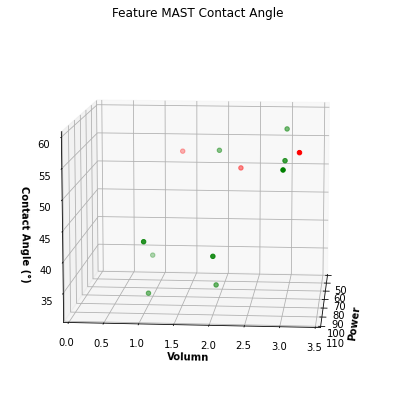

In [58]:
#3D ploting for MAST
#https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

x = df_f['Power']
y = df_f['Volumn']
z = df_f['MG8']

xc = df_c['Power']
yc = df_c['Volumn']
zc = df_c['CTRL']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.scatter3D(xc, yc, zc, color = "red")
plt.title("Feature MAST Contact Angle")

ax.set_xlabel('Power', fontweight ='bold')
ax.set_ylabel('Volumn', fontweight ='bold')
ax.set_zlabel('Contact Angle (°)', fontweight ='bold')
ax.view_init(elev=10., azim=5)
 
plt.xlim(50, 110)
plt.ylim(0, 3.5)
# show plot
plt.show()



In [26]:
xs=x
ys=y
zs=z

NameError: name 'args' is not defined

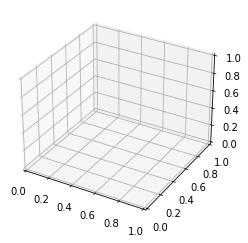

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(xs, ys, zs, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [15]:
x

1      80
2      90
3     100
5      80
6      90
7     100
9      80
10     90
11    100
Name: Power, dtype: int64